In [1]:
import sys; sys.path.append('..')
import pyzx as zx
import random
from fractions import Fraction
%config InlineBackend.figure_format = 'svg'

Available backends: simple, igraph


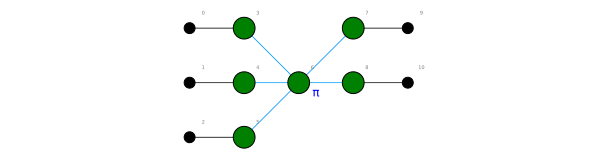

In [2]:
tree = zx.Graph()
ty = [0,0,0,   1,1,1,   1,    1,1,   0,0]
q  = [0,1,2,   0,1,2,   1,    0,1,   0,1]
r  = [0,0,0,   1,1,1,   2,    3,3,   4,4]
tree.add_vertices(len(ty))
for i,t in enumerate(ty):
    tree.set_type(i, t)
    tree.set_vdata(i, 'q', q[i])
    tree.set_vdata(i, 'r', r[i])
tree.add_edges([(0,3), (1,4), (2,5)])
tree.add_edges([(3,6), (4,6), (5,6), (6,7), (6,8)], edgetype=2)
tree.add_edges([(7,9), (8,10)])
tree.set_angle(6, 1)
zx.draw(tree, labels=True, h_edge_draw='blue')

In [3]:
m = zx.match_pivot_parallel(tree)
m

[[6, 7, [], [9], [8, 3, 4, 5], [], []]]

In [4]:
zx.pivot(tree, m)

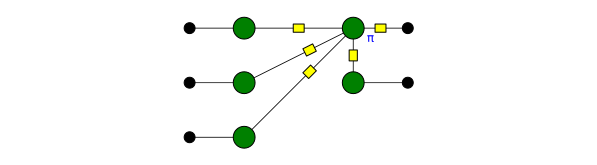

In [5]:
zx.draw(tree)

In [3]:
tree = zx.Graph()
ty = [0,0,0,   1,1,1,   1,   1,   1,1,   0,0]
q  = [0,1,2,   0,1,2,   1,   1,   0,1,   0,1]
r  = [0,0,0,   1,1,1,   2,   3,   4,4,   5,5]
tree.add_vertices(len(ty))
for i,t in enumerate(ty):
    tree.set_type(i, t)
    tree.set_vdata(i, 'q', q[i])
    tree.set_vdata(i, 'r', r[i])
tree.add_edges([(0,3), (1,4), (2,5)])
tree.add_edges([(3,6), (4,6), (5,6), (6,7), (7,8), (7,9), (3,8), (5,7)], edgetype=2)
tree.add_edges([(8,10), (9,11)])
tree.set_angle(6, 1)

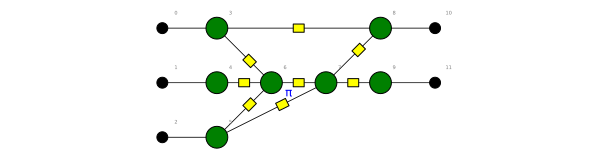

In [4]:
zx.draw(tree, labels=True)

In [5]:
tree1 = tree.copy()
zx.match_pivot_parallel(tree1)
#zx.lcomp(tree1, zx.rules.match_lcomp_parallel(tree1))
#zx.draw(tree1, labels=True)

[[6, 7, [], [], [3, 4], [8, 9], [5]]]

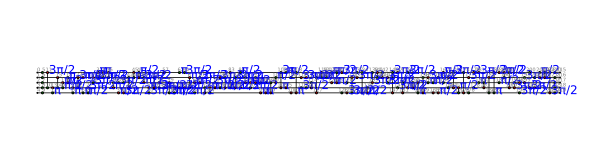

In [19]:
random.seed(34249)
cliff = zx.examples.cliffords(5,100)
zx.draw(cliff, labels=True)

In [20]:
zx.clifford_simp(cliff)

spider_simp
41. 31. 13. 12. 8. 4. 
finished in 7 iterations
lcomp_simp
25. 17. 9. 6. 7. 5. 4. 3. 2. 2. 2. 3. 2. 1. 1. 1. 1. 
finished in 18 iterations
pivot_simp

finished in 1 iterations


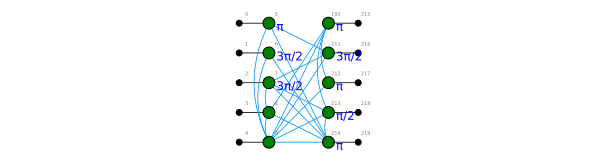

In [21]:
zx.drawing.pack_circuit_nf(cliff, 'gslc')
zx.draw(cliff, h_edge_draw='blue', labels=True)

In [18]:
[cliff.get_type(n) for n in cliff.get_neighbours(103)]

[1, 1, 1, 1, 1, 1, 1]

In [15]:
random.seed(133)
%time g = zx.examples.cliffords(5,10**4)
%time zx.simplify.clifford_simp(g)

Wall time: 240 ms
spider_simp
4016. 2678. 1632. 956. 484. 178. 42. 15. 4. 
finished in 10 iterations
pivot_simp
1327. 488. 172. 53. 4. 2. 
finished in 7 iterations
lcomp_simp
2358. 869. 581. 377. 310. 234. 188. 148. 130. 107. 86. 63. 59. 47. 42. 39. 36. 34. 24. 25. 23. 15. 18. 10. 12. 8. 6. 8. 10. 4. 4. 8. 4. 4. 3. 2. 2. 2. 1. 2. 3. 
finished in 42 iterations
pivot_simp
1. 
finished in 2 iterations
Wall time: 2.12 s


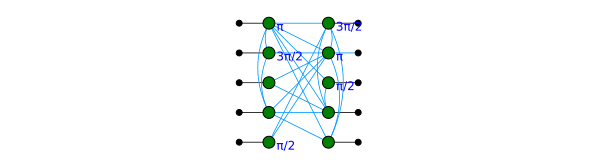

In [16]:
zx.drawing.pack_circuit_nf(g, 'gslc')
zx.draw(g, h_edge_draw='blue')

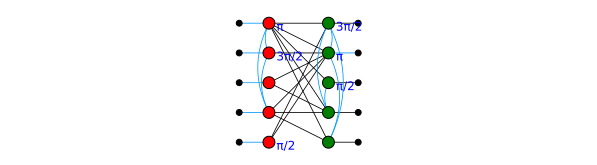

In [17]:
zx.to_rg(g, select=lambda v: g.get_vdata(v,'r') == 1)
zx.draw(g, h_edge_draw='blue')